In [1]:
from google.colab import files

song = files.upload()

Saving Sililara_Sitha_Nayana_-_Soorya_Nagare_Athula_Adikari_Sarigama_lk.mp3 to Sililara_Sitha_Nayana_-_Soorya_Nagare_Athula_Adikari_Sarigama_lk.mp3


# Waveform Visualization

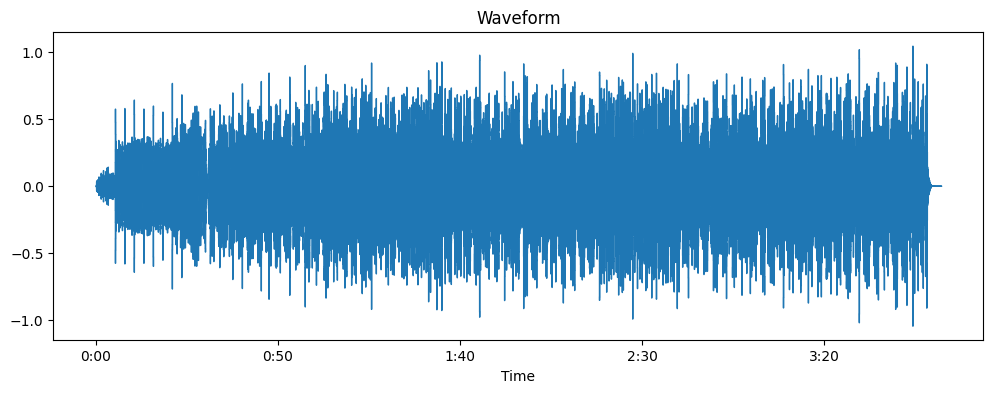

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

song_path = '/content/Sililara_Sitha_Nayana_-_Soorya_Nagare_Athula_Adikari_Sarigama_lk.mp3'
y, sr = librosa.load(song_path)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()


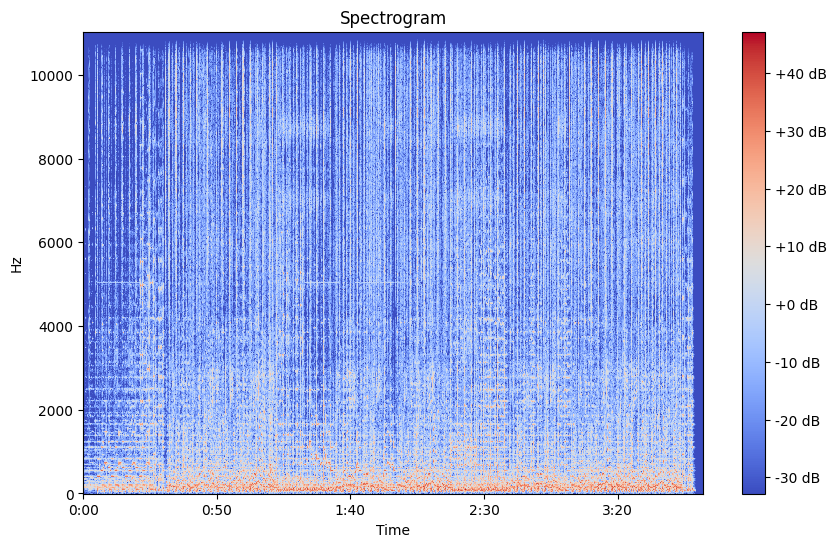

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load(song_path)
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram')
plt.show()


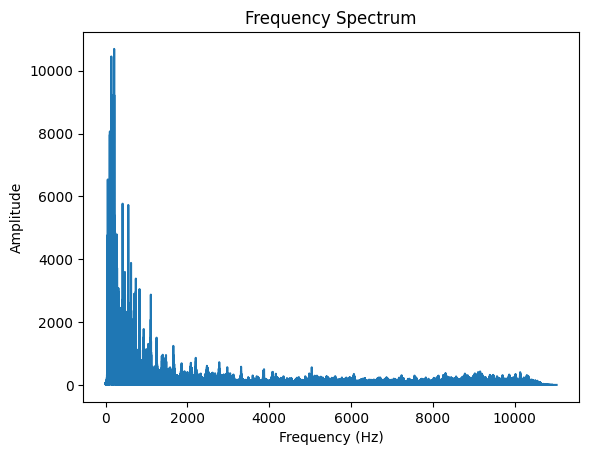

In [6]:
from scipy.fft import fft
import numpy as np

y, sr = librosa.load(song_path)
Y = fft(y)
Y = np.abs(Y[:len(Y) // 2])  # Keep only half of the spectrum
freqs = np.fft.fftfreq(len(y), 1 / sr)[:len(Y)]

plt.plot(freqs, Y)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


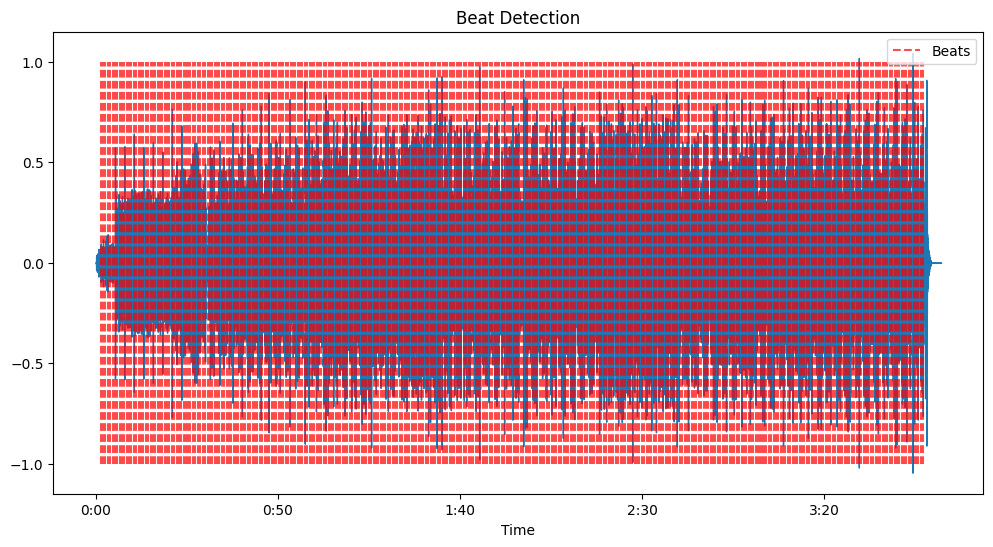

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load(song_path)
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

plt.figure(figsize=(12, 6))
librosa.display.waveshow(y, sr=sr)
plt.vlines(beat_times, -1, 1, color='r', alpha=0.7, linestyle='--', label='Beats')
plt.legend(loc='upper right')
plt.title(f'Beat Detection')
plt.show()


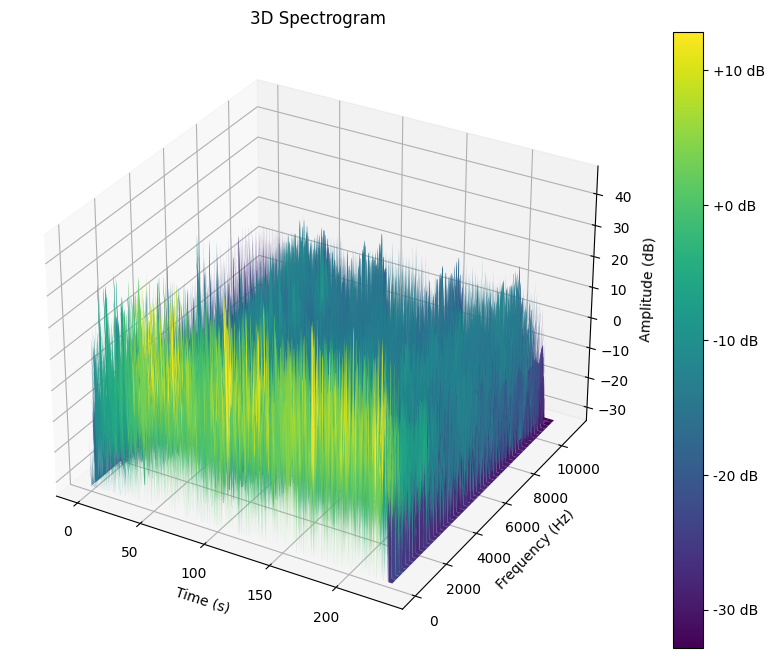

In [9]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load audio file
y, sr = librosa.load(song_path)

# Short-time Fourier transform (STFT)
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(abs(S))

# Prepare the data for 3D plotting
time = np.linspace(0, len(y) / sr, S_db.shape[1])
frequencies = np.linspace(0, sr / 2, S_db.shape[0])
time, frequencies = np.meshgrid(time, frequencies)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(time, frequencies, S_db, cmap='viridis')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_zlabel('Amplitude (dB)')
ax.set_title('3D Spectrogram')

# Add a color bar which maps values to colors
fig.colorbar(surf, ax=ax, format="%+2.0f dB")

plt.show()
